In [1]:
import tensorflow
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  shear_range=0.2,
                                  zoom_range=0.2)

In [4]:
training_set=train_datagen.flow_from_directory('chest_xray/train',
                                                target_size = (64,64),
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [5]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [6]:
test_datagen = ImageDataGenerator(rescale = 1/255)

testing_set = test_datagen.flow_from_directory('chest_xray/test',
                                              target_size = (64,64),
                                              class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [7]:
testing_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
from tensorflow.keras import Sequential
classifier = Sequential()

In [9]:
# 1. Convolutional 
from tensorflow.keras.layers import Conv2D
classifier.add(Conv2D(input_shape = [64 ,64, 3],
                     filters = 32,kernel_size = 3,activation = 'relu' ))

c:\Users\revan\anaconda\envs\tfod\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
## 2. Max Polling

from tensorflow.keras.layers import MaxPooling2D
classifier.add(MaxPooling2D(pool_size = 2,strides = 2))

In [11]:
## 3. Flatten

from tensorflow.keras.layers import Flatten
classifier.add(Flatten())

In [12]:
## 4. Full Connection

from tensorflow.keras.layers import Dense

# Hidden layer with 128 neurons
classifier.add(Dense(units = 128,activation = 'relu'))

# Output layer with 1 neuron
classifier.add(Dense(units = 2,activation = 'softmax'))


In [13]:
classifier.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [14]:
classifier.fit(x = training_set,validation_data = testing_set,epochs = 35)

Epoch 1/35


c:\Users\revan\anaconda\envs\tfod\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 607ms/step - accuracy: 0.7764 - loss: 0.8138 - val_accuracy: 0.8526 - val_loss: 0.3358
Epoch 2/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 428ms/step - accuracy: 0.9264 - loss: 0.1916 - val_accuracy: 0.8718 - val_loss: 0.3349
Epoch 3/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 422ms/step - accuracy: 0.9309 - loss: 0.1838 - val_accuracy: 0.8413 - val_loss: 0.4384
Epoch 4/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 448ms/step - accuracy: 0.9419 - loss: 0.1594 - val_accuracy: 0.8301 - val_loss: 0.4583
Epoch 5/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 439ms/step - accuracy: 0.9505 - loss: 0.1288 - val_accuracy: 0.8654 - val_loss: 0.4362
Epoch 6/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 413ms/step - accuracy: 0.9421 - loss: 0.1387 - val_accuracy: 0.8910 - val_loss: 0.2883
Epoch 7/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 394ms/step - accuracy: 0.9440 - loss: 0.1370 - val_accuracy: 0.8766 - val_loss: 0.4392
Epoch 8/35
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.9493 - loss: 0.1241 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


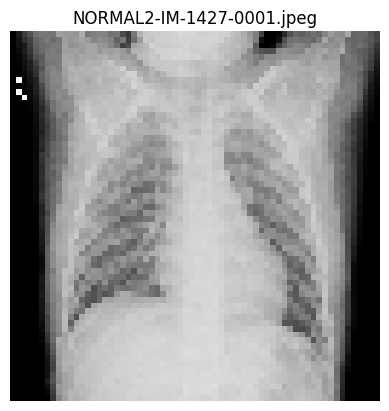

NORMAL2-IM-1427-0001.jpeg: Patient is NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


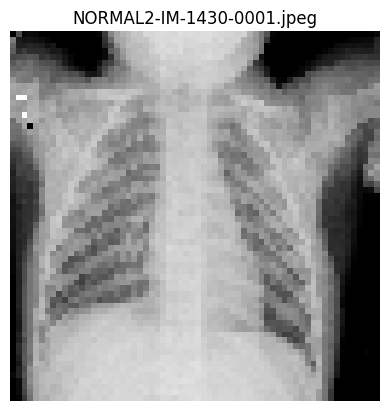

NORMAL2-IM-1430-0001.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


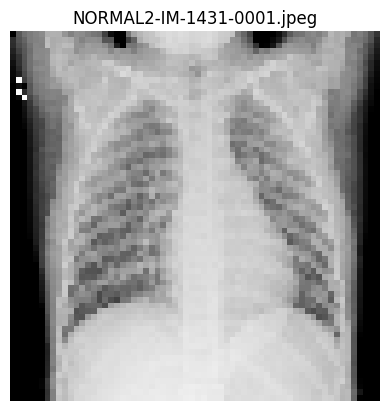

NORMAL2-IM-1431-0001.jpeg: Patient is NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


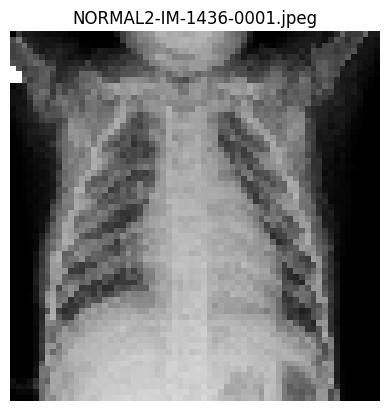

NORMAL2-IM-1436-0001.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


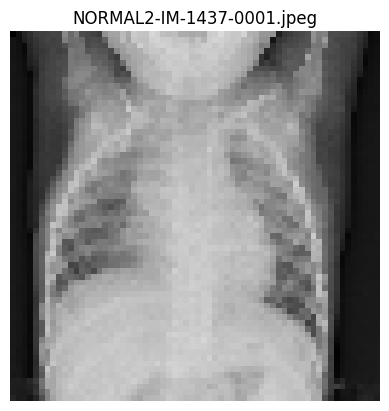

NORMAL2-IM-1437-0001.jpeg: Patient is NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


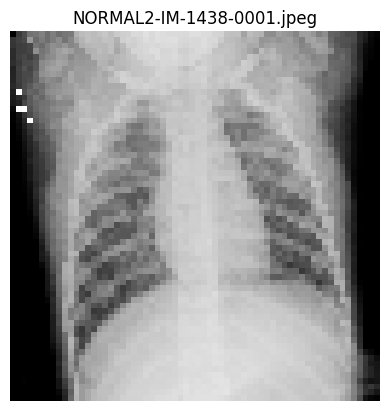

NORMAL2-IM-1438-0001.jpeg: Patient is NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


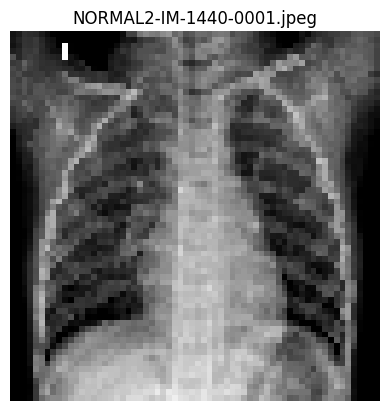

NORMAL2-IM-1440-0001.jpeg: Patient is NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


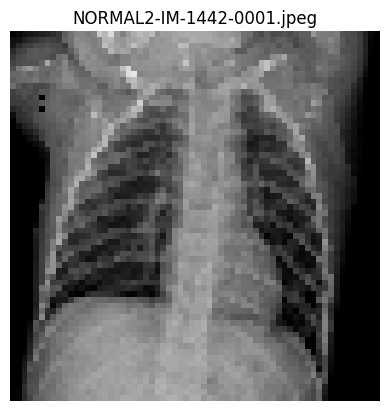

NORMAL2-IM-1442-0001.jpeg: Patient is NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


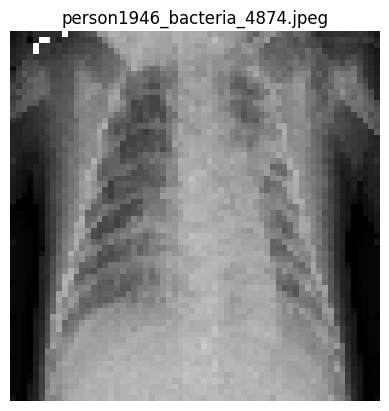

person1946_bacteria_4874.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


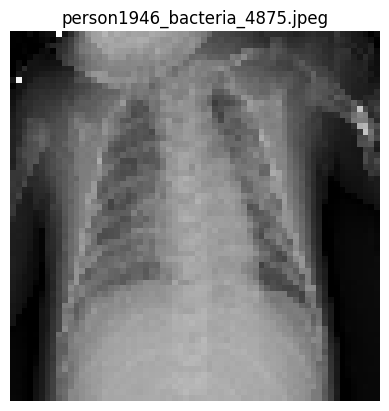

person1946_bacteria_4875.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


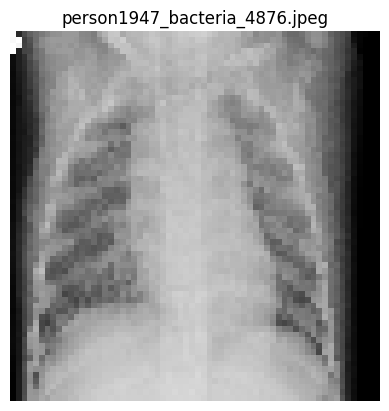

person1947_bacteria_4876.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


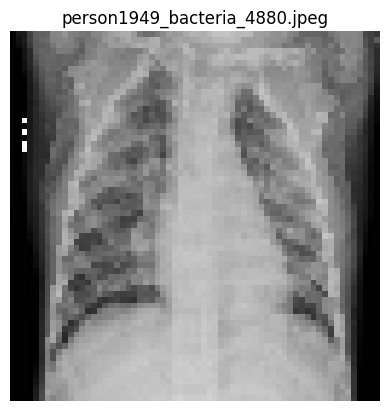

person1949_bacteria_4880.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


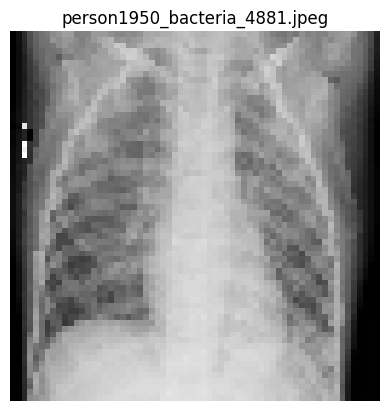

person1950_bacteria_4881.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


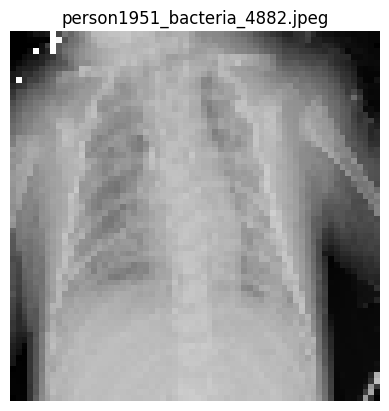

person1951_bacteria_4882.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


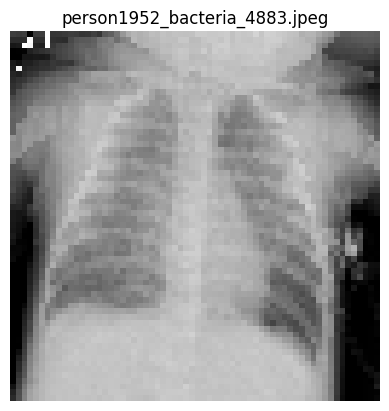

person1952_bacteria_4883.jpeg:Patient is suffering from PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


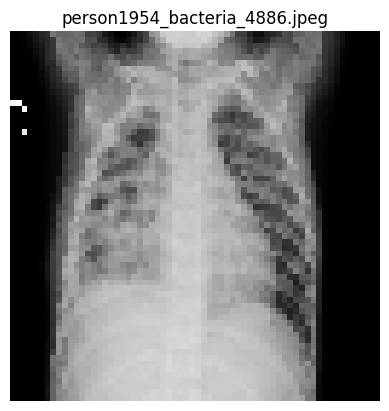

person1954_bacteria_4886.jpeg:Patient is suffering from PNEUMONIA


In [17]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

image_dir = 'D:\\python\\chest_xray\\all Test Images'
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img = image.load_img(img_path, target_size=(64, 64)) 
    
    plt.figure()
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')  
    
    test_image = image.img_to_array(img)

    test_image = np.expand_dims(img, axis=0)

    test_image = test_image / 255.0  # Normalize the image if required by your model
    result = classifier.predict(test_image)

# Interpret the result based on your specific model's output
    if round(result[0][0]) == 1:
        prediction = 'NORMAL'
    else:
        prediction = 'PNEUMONIA'
        
    plt.title(img_file)
    
    plt.xlabel(prediction)
    plt.show()
    if prediction == 'PNEUMONIA':
        print(f"{img_file}:Patient is suffering from {prediction}")
    else:
        print(f"{img_file}: Patient is {prediction}")

    plt.show()
